In [1]:
#imports
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import inconsistent
import matplotlib.patches as mpatches


plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = '14'

In [2]:
#read DB
df = pd.read_csv("HR.csv") 

In [3]:
#normalization
df_norm = pd.read_csv("HR.csv") 

def normalize(dataset, min_dataset, max_dataset):
    result = []
    for i in dataset:
        new_value = (i - min_dataset)/(float(max_dataset - min_dataset))*(1-0.1)+0.1
        result.append(new_value)
    return result

#massimi - minimi
min_number_project = min(df_norm['number_project'])
max_number_project = max(df_norm['number_project'])

min_time_spend_company = min(df_norm['time_spend_company'])
max_time_spend_company = max(df_norm['time_spend_company'])

min_average_montly_hours = min(df_norm['average_montly_hours'])
max_average_montly_hours = max(df_norm['average_montly_hours'])

#normalizzazioni
normalized_number_project = normalize(df_norm['number_project'], min_number_project, max_number_project)
normalized_time_spend_company = normalize(df_norm['time_spend_company'], min_time_spend_company, max_time_spend_company)
normalized_average_montly_hours = normalize(df_norm['average_montly_hours'], min_average_montly_hours, max_average_montly_hours)

salary_int= sorted(df_norm['salary'].unique())
salary_int_mapping = dict(zip(salary_int, [1, 0, 0.5]))

In [4]:
#data frame normalizzato
df_norm = df[['satisfaction_level','last_evaluation']]
df_norm = df_norm.assign(NP_n=normalized_number_project, TSC_n = normalized_time_spend_company, AMH_n = normalized_average_montly_hours)

In [5]:
#data frame di chi ha lasciato e di chi è rimasto
df_trimmed = pd.read_csv("HR.csv")

del df_trimmed['promotion_last_5years']
del df_trimmed['Work_accident']

df_stayed = df_trimmed[df_trimmed['left'] == 0]
df_left = df_trimmed[df_trimmed['left'] == 1]

del df_stayed['left']
del df_left['left']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008564E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FFC8A58>]], dtype=object)

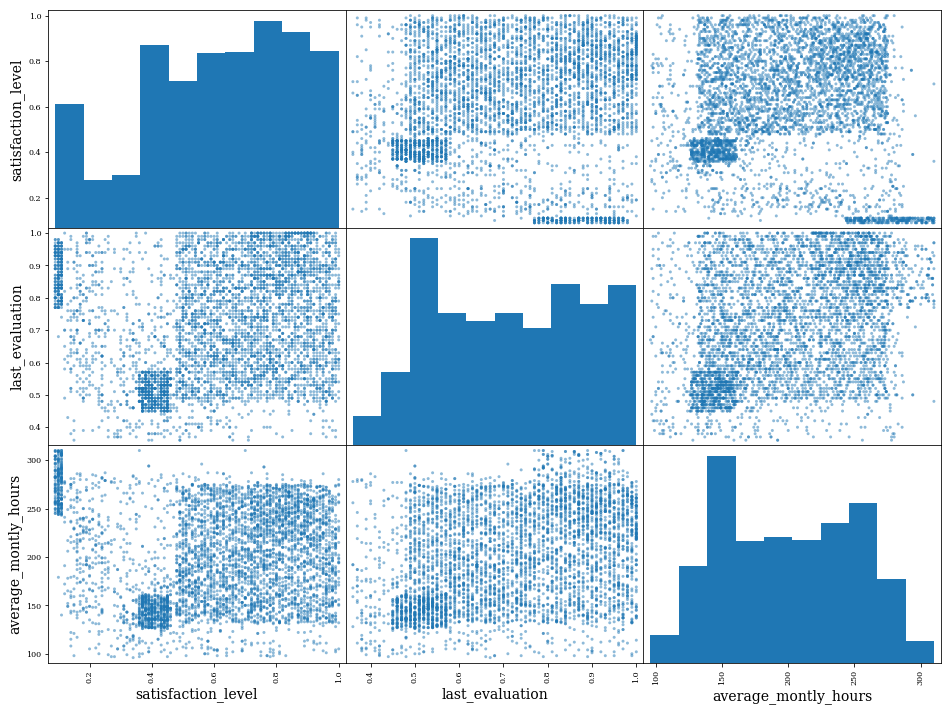

In [6]:
#scatter matrix continuous values 
df_sampled = df[['satisfaction_level', 'last_evaluation','average_montly_hours']].sample(5000)
pd.plotting.scatter_matrix(df_sampled, figsize=(16,12))

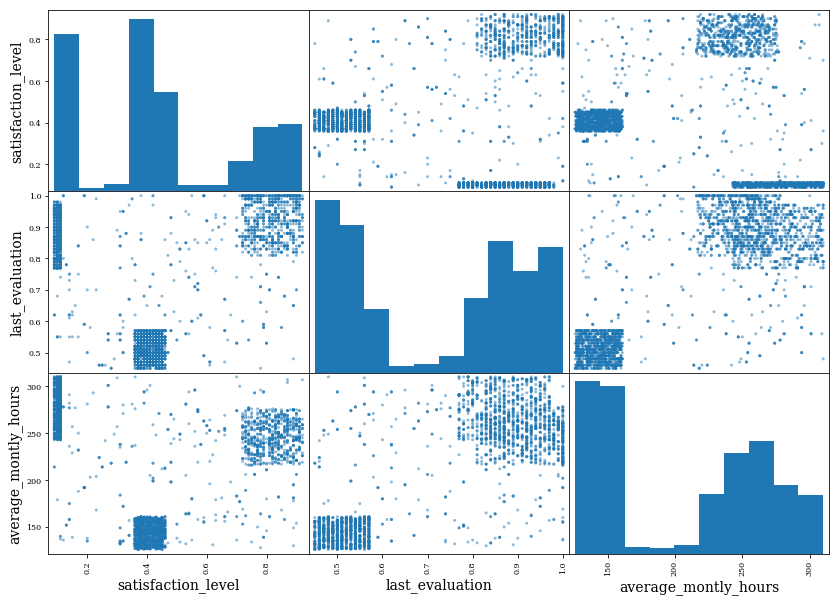

In [7]:
#scatter matrix continuous values di chi ha lasciato
df_left_cont = df_left[['satisfaction_level', 'last_evaluation','average_montly_hours']]
fig = pd.plotting.scatter_matrix(df_left_cont, figsize=(14,10))

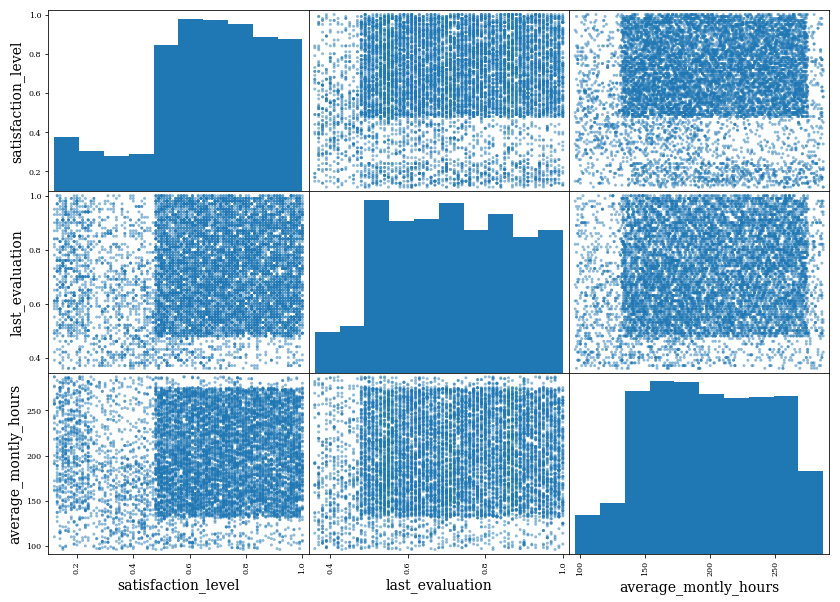

In [8]:
#scatter matrix continuous values di chi è rimasto
df_stayed_cont = df_stayed[['satisfaction_level', 'last_evaluation','average_montly_hours']]
fig = pd.plotting.scatter_matrix(df_stayed_cont, figsize=(14,10))

In [9]:
#Computes the (weighted) graph of k-Neighbors for points in X
sample = df_norm

connectivity = kneighbors_graph(sample, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [10]:
#ward method con distanza euclidea
print 'ward'
ward = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(sample)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(sample, ward.labels_)

ward
labels {0: 2183, 1: 2318, 2: 2161, 3: 3756, 4: 4581}
silhouette 0.214259058607


labels:  {0: 2318, 1: 3756, 2: 2161, 3: 1261, 4: 4581, 5: 922}


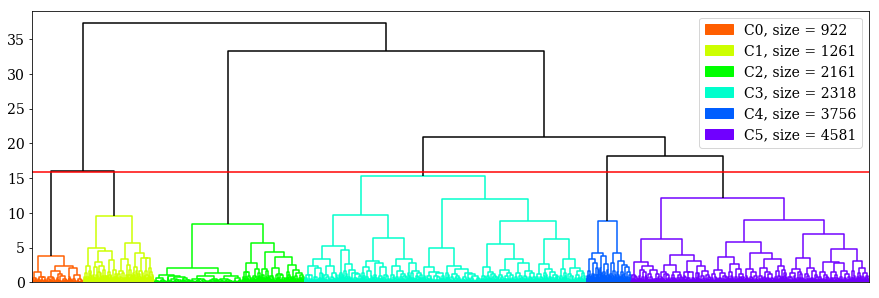

In [11]:
# ward linkage with euclidean distance and dendogram using scipy
cmap = cm.gist_rainbow(np.linspace(0.1, 1, 7))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

fig = plt.figure(1, figsize=(15, 5))
data_dist = pdist(sample, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold = 15.9, above_threshold_color  = '#000000', no_labels= True ) #, truncate_mode = 'lastp', p = 500 )
plt.axhline(y=15.9, c='r')

c0 = mpatches.Patch(color='#ff5e00', label='C0, size = 922')
c1 = mpatches.Patch(color='#cdff00', label='C1, size = 1261')
c2 = mpatches.Patch(color='#00ff00', label='C2, size = 2161')
c3 = mpatches.Patch(color='#00ffcc', label='C3, size = 2318')
c4 = mpatches.Patch(color='#005eff', label='C4, size = 3756')
c5 = mpatches.Patch(color='#7000ff', label='C5, size = 4581')

plt.legend(handles=[c0, c1, c2, c3, c4, c5]) #, bbox_to_anchor=(1.01, 0.5), loc=2, borderaxespad=0)
#plt.title('Dendrogramma con distanza euclidea e criterio di Ward', size = 22)

method = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',connectivity = connectivity)
method.fit(sample)
hist, bins = np.histogram(method.labels_, bins=range(0, len(set(method.labels_)) + 1))
print 'labels: ', dict(zip(bins, hist))

plt.savefig('../Images/Clustering/Hiercarchical_Ward.png', format='png', bbox_inches='tight')

In [12]:
bins

array([0, 1, 2, 3, 4, 5, 6])

labels:  {0: 13206, 1: 8, 2: 1777, 3: 4, 4: 4}
labels:  {0: 14966, 1: 10, 2: 18, 3: 4, 4: 1}


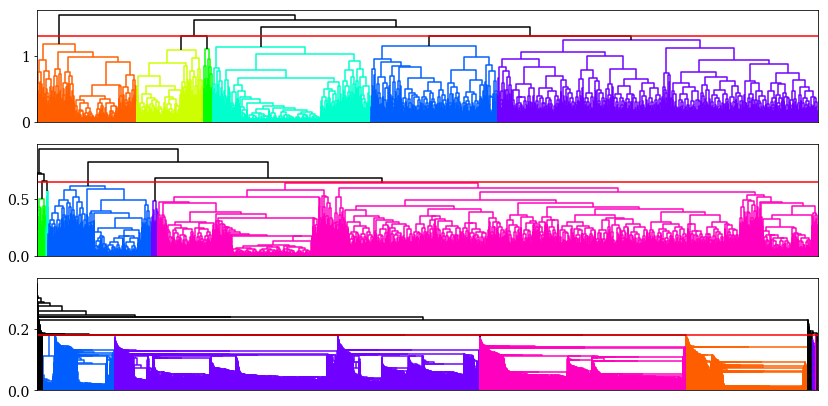

In [8]:
# average linkage with euclidean distance and dendogram using scipy

fig = plt.figure(figsize=(14, 7)) 
fig_dims = (3, 1)

ax = plt.subplot2grid(fig_dims, (0, 0))
data_dist = pdist(sample, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold = 1.3, above_threshold_color  = '#000000', no_labels= True)
#plt.title('Dendrogramma con distanza euclidea e  Complete Linkage', size = 18)
plt.axhline(y=1.3, c='r')

method = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean',connectivity = connectivity)
method.fit(sample)
hist, bins = np.histogram(method.labels_, bins=range(0, len(set(method.labels_)) + 1))
print 'labels: ', dict(zip(bins, hist))


# complete linkage with euclidean distance and dendogram using scipy
ax = plt.subplot2grid(fig_dims, (1, 0))
data_dist = pdist(sample, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold = 0.65, above_threshold_color  = '#000000', no_labels= True)
#plt.title('Dendrogramma con distanza euclidea e Average Linkage', size = 18)
plt.axhline(y=0.65, c='r')

method = AgglomerativeClustering(n_clusters=5, linkage='average', affinity='euclidean',connectivity = connectivity)
method.fit(sample)
hist, bins = np.histogram(method.labels_, bins=range(0, len(set(method.labels_)) + 1))
print 'labels: ', dict(zip(bins, hist))

# single linkage with euclidean distance and dendogram using scipy
ax = plt.subplot2grid(fig_dims, (2, 0))
data_dist = pdist(sample, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold = 0.18, above_threshold_color  = '#000000', no_labels= True)
#plt.title('Dendrogramma con distanza euclidea e Single Linkage', size = 18)
plt.axhline(y=0.18, c='r')


plt.savefig('../Images/Clustering/Hiercarchical_AvgComp.png', format='png', bbox_inches='tight')

In [40]:
#database normalizzato con colonna clusters
df_norm_c = df_norm
df_norm_c = df_norm_c.assign(cluster= method.labels_) 

In [41]:
#descrizione per ogni cluster

df_norm_c[df_norm_c['cluster'] == 0].describe()
#df_norm_c[df_norm_c['cluster'] == 1].describe()
#df_norm_c[df_norm_c['cluster'] == 2].describe()
#df_norm_c[df_norm_c['cluster'] == 3].describe()
#df_norm_c[df_norm_c['cluster'] == 4].describe()


,satisfaction_level,last_evaluation,AMH_n,NP_n,TSC_n,cluster
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.0
mean,0.755457,0.859646,0.705807,0.537265,0.429541,0.0
std,0.145749,0.114938,0.130977,0.131781,0.247325,0.0
min,0.140000,0.370000,0.150467,0.100000,0.100000,0.0
25%,0.660000,0.800000,0.667757,0.460000,0.212500,0.0
50%,0.780000,0.880000,0.730841,0.460000,0.437500,0.0
75%,0.870000,0.950000,0.792874,0.640000,0.550000,0.0
max,1.000000,1.000000,0.987383,0.820000,1.000000,0.0


In [233]:
#assegnazione di un colore ad ogni cluster
color = []
for cl in df_norm_c['cluster'].values:
    if cl == 0:
        color.append('#ff5e00')
    elif cl == 1:
        color.append('#cdff00')
    elif cl == 2:
        color.append('#00ff00')
    elif cl == 3:
        color.append('#00ffcc')
    elif cl == 4:
        color.append('#005eff')
    else:
        color.append('#7000ff')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000040534A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000006A8F1080>]], dtype=object)

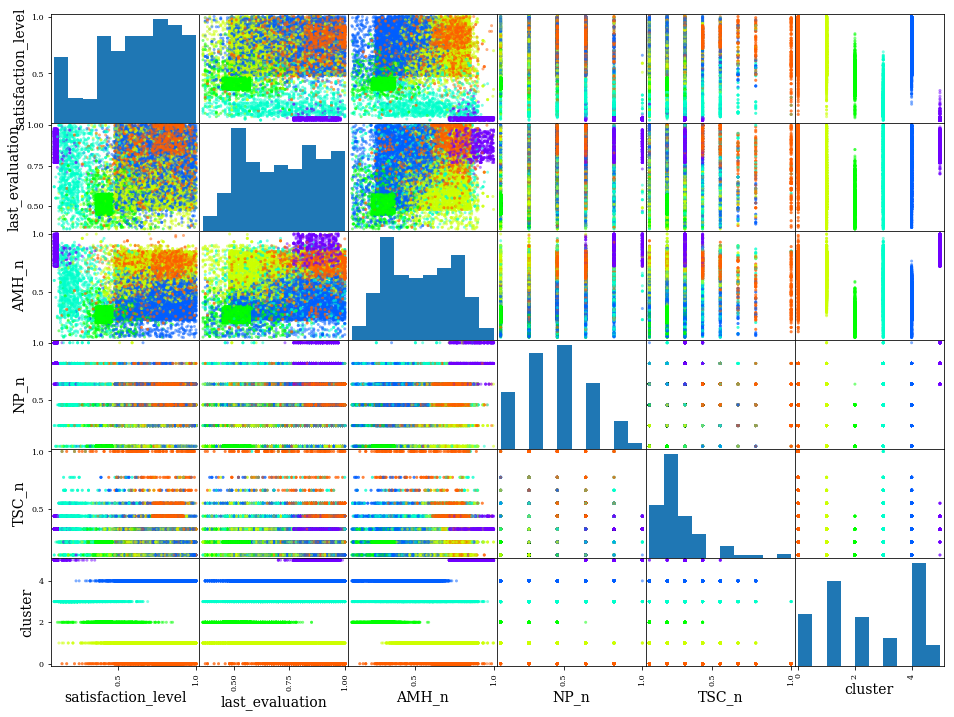

In [234]:
pd.plotting.scatter_matrix(df_norm_c, figsize=(16,12),c = color)        

In [43]:
from mpl_toolkits.mplot3d import Axes3D

#first row
#satisfaction level -- histogram
ax = plt.subplot2grid(fig_dims, (0, 0))
ax.scatter(df_norm_c['satisfaction_level'],
               df_norm_c['last_evaluation'], df_norm_c['AMH_n'])

TypeError: unbound method scatter() must be called with Axes3D instance as first argument (got Series instance instead)

In [33]:
from pandas.plotting import parallel_coordinates
# from pandas.tools.plotting import parallel_coordinates


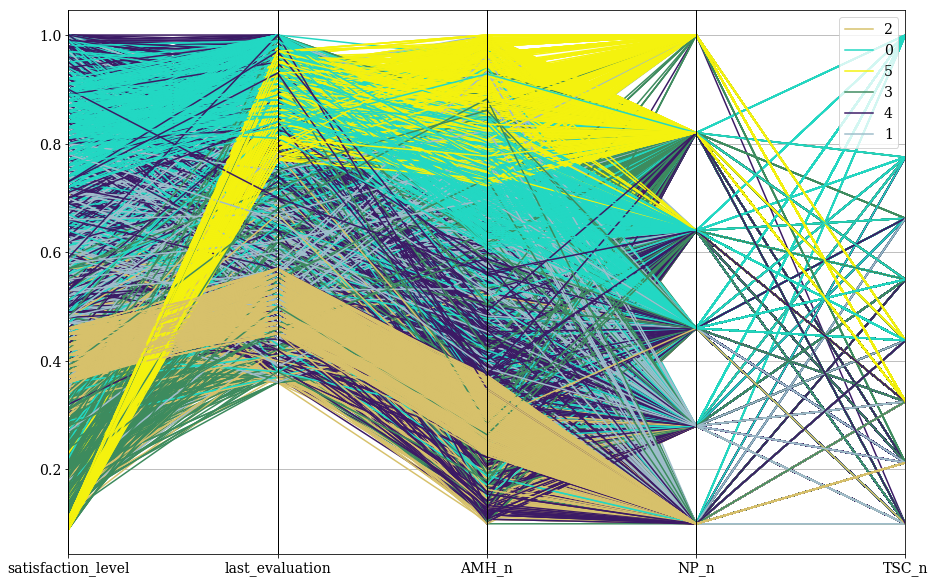

In [42]:
plt.figure(figsize=(15, 10))
parallel_coordinates(df_norm_c, 'cluster') #colormap='gist_rainbow'

linkage:  ward     n_clust:  2     affinity:  euclidean
labels:  {0: 12816, 1: 2183}
silhouette:  0.327896138295
linkage:  ward     n_clust:  3     affinity:  euclidean
labels:  {0: 10655, 1: 2183, 2: 2161}
silhouette:  0.266680806911
linkage:  ward     n_clust:  4     affinity:  euclidean
labels:  {0: 8337, 1: 2183, 2: 2161, 3: 2318}
silhouette:  0.211471344008
linkage:  ward     n_clust:  5     affinity:  euclidean
labels:  {0: 2183, 1: 2318, 2: 2161, 3: 3756, 4: 4581}
silhouette:  0.214259058607
linkage:  ward     n_clust:  6     affinity:  euclidean
labels:  {0: 2318, 1: 3756, 2: 2161, 3: 1261, 4: 4581, 5: 922}
silhouette:  0.217919881227
linkage:  ward     n_clust:  7     affinity:  euclidean
labels:  {0: 3756, 1: 4581, 2: 2161, 3: 1261, 4: 1915, 5: 922, 6: 403}
silhouette:  0.218782598052
linkage:  ward     n_clust:  8     affinity:  euclidean
labels:  {0: 4581, 1: 1261, 2: 2161, 3: 2214, 4: 1915, 5: 922, 6: 403, 7: 1542}
silhouette:  0.209130471396
linkage:  ward     n_clust:  9

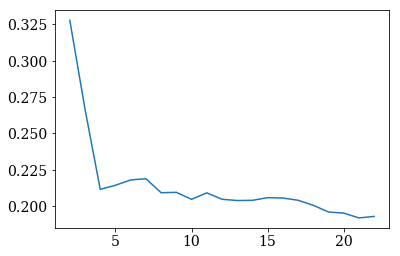

linkage:  average     n_clust:  2     affinity:  euclidean
labels:  {0: 14995, 1: 4}
silhouette:  0.367875385004
linkage:  average     n_clust:  3     affinity:  euclidean
labels:  {0: 28, 1: 4, 2: 14967}
silhouette:  0.316872732575
linkage:  average     n_clust:  4     affinity:  euclidean
labels:  {0: 14967, 1: 10, 2: 18, 3: 4}
silhouette:  0.289394722702
linkage:  average     n_clust:  5     affinity:  euclidean
labels:  {0: 14966, 1: 10, 2: 18, 3: 4, 4: 1}
silhouette:  0.191033524808
linkage:  average     n_clust:  6     affinity:  euclidean
labels:  {0: 18, 1: 10, 2: 14958, 3: 4, 4: 1, 5: 8}
silhouette:  0.177824425097
linkage:  average     n_clust:  7     affinity:  euclidean
labels:  {0: 10, 1: 8, 2: 14958, 3: 4, 4: 1, 5: 8, 6: 10}
silhouette:  0.175267222133
linkage:  average     n_clust:  8     affinity:  euclidean
labels:  {0: 14958, 1: 8, 2: 8, 3: 4, 4: 1, 5: 6, 6: 10, 7: 4}
silhouette:  0.171403112843
linkage:  average     n_clust:  9     affinity:  euclidean
labels:  {0: 1

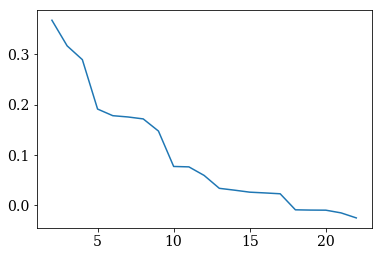

linkage:  average     n_clust:  2     affinity:  manhattan
labels:  {0: 16, 1: 14983}
silhouette:  0.369715424079
linkage:  average     n_clust:  3     affinity:  manhattan
labels:  {0: 14983, 1: 12, 2: 4}
silhouette:  0.310464665194
linkage:  average     n_clust:  4     affinity:  manhattan
labels:  {0: 14973, 1: 12, 2: 4, 3: 10}
silhouette:  0.264836969136
linkage:  average     n_clust:  5     affinity:  manhattan
labels:  {0: 14970, 1: 12, 2: 4, 3: 10, 4: 3}
silhouette:  0.242836111558
linkage:  average     n_clust:  6     affinity:  manhattan
labels:  {0: 14966, 1: 12, 2: 4, 3: 10, 4: 3, 5: 4}
silhouette:  0.155686798469
linkage:  average     n_clust:  7     affinity:  manhattan
labels:  {0: 12, 1: 14956, 2: 10, 3: 10, 4: 3, 5: 4, 6: 4}
silhouette:  0.145150603332
linkage:  average     n_clust:  8     affinity:  manhattan
labels:  {0: 14956, 1: 10, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 6}
silhouette:  0.144197104601
linkage:  average     n_clust:  9     affinity:  manhattan
labels:  {0

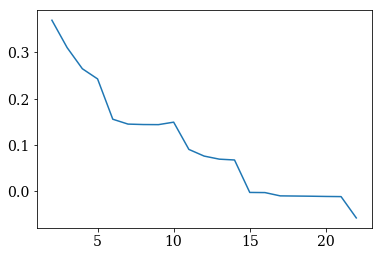

linkage:  average     n_clust:  2     affinity:  cosine
labels:  {0: 14998, 1: 1}
silhouette:  0.282608862791
linkage:  average     n_clust:  3     affinity:  cosine
labels:  {0: 14991, 1: 1, 2: 7}
silhouette:  0.238718582914
linkage:  average     n_clust:  4     affinity:  cosine
labels:  {0: 14983, 1: 8, 2: 7, 3: 1}
silhouette:  0.21524867327
linkage:  average     n_clust:  5     affinity:  cosine
labels:  {0: 14972, 1: 8, 2: 7, 3: 1, 4: 11}
silhouette:  0.115866849768
linkage:  average     n_clust:  6     affinity:  cosine
labels:  {0: 84, 1: 8, 2: 14888, 3: 1, 4: 11, 5: 7}
silhouette:  0.0997477599944
linkage:  average     n_clust:  7     affinity:  cosine
labels:  {0: 14888, 1: 8, 2: 7, 3: 1, 4: 11, 5: 42, 6: 42}
silhouette:  0.0669963577463
linkage:  average     n_clust:  8     affinity:  cosine
labels:  {0: 14804, 1: 84, 2: 7, 3: 8, 4: 11, 5: 42, 6: 42, 7: 1}
silhouette:  0.0393221771502
linkage:  average     n_clust:  9     affinity:  cosine
labels:  {0: 7, 1: 84, 2: 197, 3: 14

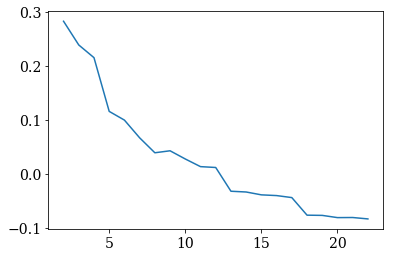

linkage:  complete     n_clust:  2     affinity:  euclidean
labels:  {0: 14983, 1: 16}
silhouette:  0.383820949115
linkage:  complete     n_clust:  3     affinity:  euclidean
labels:  {0: 16, 1: 13206, 2: 1777}
silhouette:  -0.0553334628665
linkage:  complete     n_clust:  4     affinity:  euclidean
labels:  {0: 12, 1: 13206, 2: 1777, 3: 4}
silhouette:  -0.0633530856091
linkage:  complete     n_clust:  5     affinity:  euclidean
labels:  {0: 13206, 1: 8, 2: 1777, 3: 4, 4: 4}
silhouette:  -0.0708197977093
linkage:  complete     n_clust:  6     affinity:  euclidean
labels:  {0: 22, 1: 8, 2: 13184, 3: 4, 4: 4, 5: 1777}
silhouette:  -0.072134482416
linkage:  complete     n_clust:  7     affinity:  euclidean
labels:  {0: 13184, 1: 8, 2: 1777, 3: 4, 4: 4, 5: 16, 6: 6}
silhouette:  -0.0738950216658
linkage:  complete     n_clust:  8     affinity:  euclidean
labels:  {0: 9744, 1: 3440, 2: 1777, 3: 8, 4: 4, 5: 16, 6: 6, 7: 4}
silhouette:  -0.0716616573442
linkage:  complete     n_clust:  9     

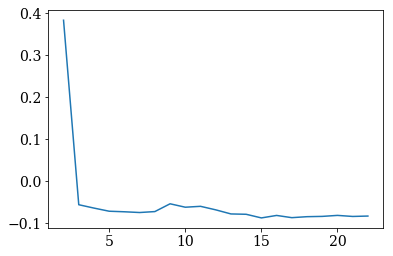

linkage:  complete     n_clust:  2     affinity:  manhattan
labels:  {0: 12919, 1: 2080}
silhouette:  -0.0192970606038
linkage:  complete     n_clust:  3     affinity:  manhattan
labels:  {0: 10006, 1: 2080, 2: 2913}
silhouette:  -0.00417924029312
linkage:  complete     n_clust:  4     affinity:  manhattan
labels:  {0: 2913, 1: 2080, 2: 7778, 3: 2228}
silhouette:  -0.0228991391531
linkage:  complete     n_clust:  5     affinity:  manhattan
labels:  {0: 2080, 1: 2228, 2: 7778, 3: 1872, 4: 1041}
silhouette:  -0.0248538953522
linkage:  complete     n_clust:  6     affinity:  manhattan
labels:  {0: 7778, 1: 2228, 2: 756, 3: 1872, 4: 1041, 5: 1324}
silhouette:  -0.0364365744019
linkage:  complete     n_clust:  7     affinity:  manhattan
labels:  {0: 756, 1: 2228, 2: 5306, 3: 1872, 4: 1041, 5: 1324, 6: 2472}
silhouette:  -0.0291966229038
linkage:  complete     n_clust:  8     affinity:  manhattan
labels:  {0: 2228, 1: 622, 2: 5306, 3: 1872, 4: 1041, 5: 1324, 6: 2472, 7: 134}
silhouette:  -0.

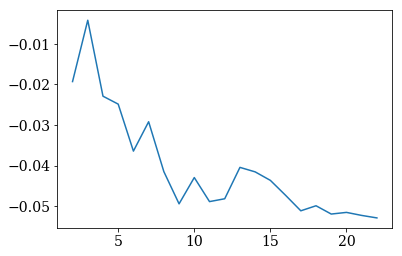

linkage:  complete     n_clust:  2     affinity:  cosine
labels:  {0: 11014, 1: 3985}
silhouette:  0.0754284270757
linkage:  complete     n_clust:  3     affinity:  cosine
labels:  {0: 3952, 1: 3985, 2: 7062}
silhouette:  0.0160208173173
linkage:  complete     n_clust:  4     affinity:  cosine
labels:  {0: 1732, 1: 2220, 2: 7062, 3: 3985}
silhouette:  -0.000447955526787
linkage:  complete     n_clust:  5     affinity:  cosine
labels:  {0: 7062, 1: 2220, 2: 1731, 3: 3985, 4: 1}
silhouette:  -0.00507022795795
linkage:  complete     n_clust:  6     affinity:  cosine
labels:  {0: 2220, 1: 2581, 2: 4481, 3: 3985, 4: 1, 5: 1731}
silhouette:  -0.0109481272823
linkage:  complete     n_clust:  7     affinity:  cosine
labels:  {0: 2581, 1: 3985, 2: 4481, 3: 2217, 4: 1, 5: 1731, 6: 3}
silhouette:  -0.0193886915423
linkage:  complete     n_clust:  8     affinity:  cosine
labels:  {0: 4481, 1: 3985, 2: 1731, 3: 2217, 4: 1, 5: 1463, 6: 3, 7: 1118}
silhouette:  -0.025785035108
linkage:  complete     

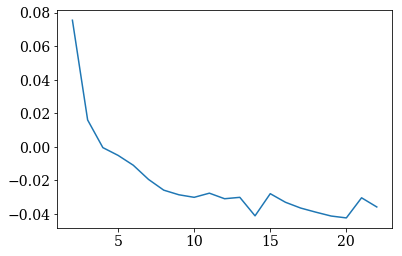

In [153]:
#ATTENZIONE! NON RIESEGUIRE, OSSERVARE E BASTA! COMPUTAZIONE MOLTO LUNGA!

#analisi della silhouette per le diverse combinazioni di tipo di linkaggio, numbero di cluster e funzione della distanza 

links = ['ward', 'average', 'complete']
clusts = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
affs = ['euclidean', 'manhattan', 'cosine'] #if ward -> euclidean 
conn = kneighbors_graph(df_norm, 100, include_self=False)


def clustering_silhouette (link, aff):
    i = 0
    s = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    for c in clusts:
        method = AgglomerativeClustering(n_clusters=c, linkage=link, affinity=aff, connectivity=conn)
        method.fit(df_norm)
        hist, bins = np.histogram(method.labels_, bins=range(0, len(set(method.labels_)) + 1))
        print 'linkage: ', link, '    n_clust: ', c, '    affinity: ', aff
        print 'labels: ', dict(zip(bins, hist))
        s[i] = silhouette_score(df_norm, method.labels_)
        print 'silhouette: ', s[i]
        i = i+1
    plt.plot(clusts, s)
    plt.show()

    
for l in links:
    if l == 'ward':
        clustering_silhouette(l, 'euclidean')            
    elif l == 'average':
        for a in affs:
            clustering_silhouette(l, a)
    else:
        for a in affs:
            clustering_silhouette(l, a)
            
#riassunto del risultato:

#WARD - EUCLIDEAN range: 0.32 - 0.19, cluster costanti,  jump 5,6,7, 11

#AVERAGE -EUCLIDEAN range: 0.36-(-0.02) cluster minuscoli da subito
#AVERAGE - MANHATTAN range: 0.36- (-0.05) cluster non omogenei
#AVERAGE - COSINE range: 0.28-(-0.08) cluster insignificanti

#COMPLETE - EUCLIDEAN range: 0.38-(-0.08) scende subito velocissima, cluster minuscoli
#COMPLETE - MANHATTAN range: -0.019 - -0.05 piuttosto costante, ma partenza bassa, cluster omogenei
#COMPLETE - COSINE range: 0.07- -0.03 partenza bassa, cluster quasi omogenei fino a n = 4
